El primer paso tiene como objetivo reducir el volumen de datos manteniendo representatividad y diversidad de ataques, para hacer viable el análisis y modelos sin perder valor técnico. Tenemos 10 ficheros CSV que corresponden a los 10 días que duró el experimento llevado a cabo por CIC junto con CSE. Por este motivo, aunque los eventos registrados buscan acercarse lo máximo posible a la realidad, cada día se detectan ataques diferentes, por lo que en cada CSV aparecen eventos benignos o alguno de los ataques planificados para ese día.

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
ruta_datasets = "datasets"

archivos_csv = [f for f in os.listdir(ruta_datasets) if f.endswith(".csv")]

muestra_combinada = pd.DataFrame()

for archivo in archivos_csv:
    ruta_archivo = os.path.join(ruta_datasets, archivo)
    print(f"Cargando muestra de: {archivo}")
    try:
        df = pd.read_csv(ruta_archivo, nrows=10000)  # Carga solo 10.000 filas de cada archivo
        df["source_file"] = archivo 
        muestra_combinada = pd.concat([muestra_combinada, df], ignore_index=True)
    except Exception as e:
        print(f"Error al leer {archivo}: {e}")


Cargando muestra de: 02-14-2018.csv
Cargando muestra de: 02-15-2018.csv
Cargando muestra de: 02-16-2018.csv
Cargando muestra de: 02-20-2018.csv
Cargando muestra de: 02-21-2018.csv
Cargando muestra de: 02-22-2018.csv
Cargando muestra de: 02-23-2018.csv
Cargando muestra de: 02-28-2018.csv
Cargando muestra de: 03-01-2018.csv


C:\Users\lcgsa\AppData\Local\Temp\ipykernel_16496\3910743457.py:11: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(ruta_archivo, nrows=10000)  # Carga solo 10.000 filas de cada archivo


Cargando muestra de: 03-02-2018.csv


In [6]:
muestra_combinada.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Idle Mean,Idle Std,Idle Max,Idle Min,Label,source_file,Flow ID,Src IP,Src Port,Dst IP
0,0,0,14/02/2018 08:31:01,112641719,3,0,0,0,0,0,...,56320859.5,139.300036,56320958.0,56320761.0,Benign,02-14-2018.csv,NaN,NaN,NaN,NaN
1,0,0,14/02/2018 08:33:50,112641466,3,0,0,0,0,0,...,56320733.0,114.551299,56320814.0,56320652.0,Benign,02-14-2018.csv,NaN,NaN,NaN,NaN
2,0,0,14/02/2018 08:36:39,112638623,3,0,0,0,0,0,...,56319311.5,301.934596,56319525.0,56319098.0,Benign,02-14-2018.csv,NaN,NaN,NaN,NaN
3,22,6,14/02/2018 08:40:13,6453966,15,10,1239,2273,744,0,...,0.0,0.0,0.0,0.0,Benign,02-14-2018.csv,NaN,NaN,NaN,NaN
4,22,6,14/02/2018 08:40:23,8804066,14,11,1143,2209,744,0,...,0.0,0.0,0.0,0.0,Benign,02-14-2018.csv,NaN,NaN,NaN,NaN


C:\Users\lcgsa\AppData\Local\Temp\ipykernel_16496\2736044444.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cantidad_clases.index, y=cantidad_clases.values, palette="viridis")


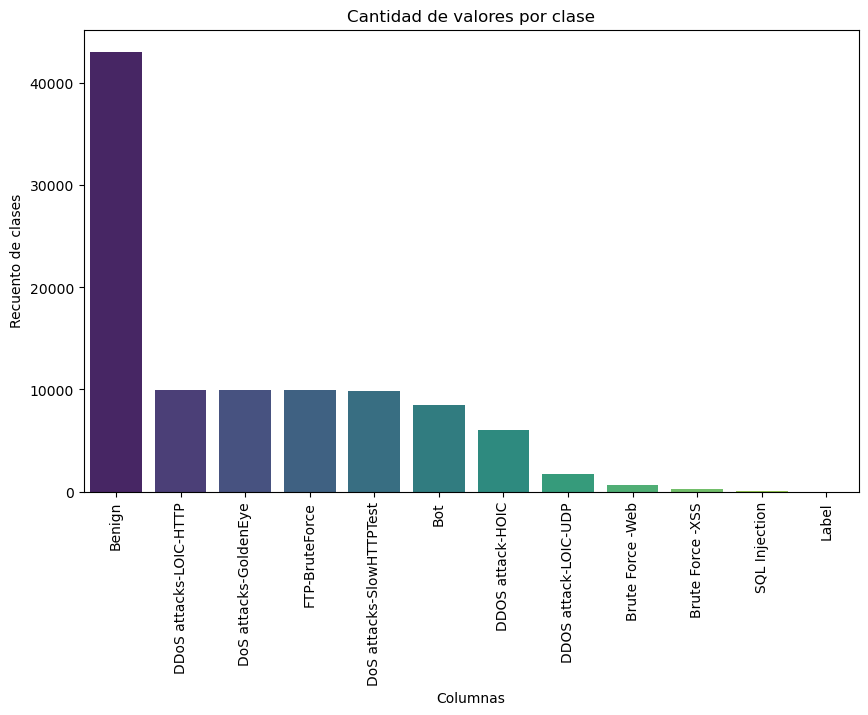

In [7]:
cantidad_clases = muestra_combinada['Label'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=cantidad_clases.index, y=cantidad_clases.values, palette="viridis")
plt.xticks(rotation=90) 
plt.title('Cantidad de valores por clase')
plt.xlabel('Columnas')
plt.ylabel('Recuento de clases')
plt.show()

In [8]:
print(muestra_combinada['Label'].value_counts())

Label
Benign                      43083
DDoS attacks-LOIC-HTTP       9934
DoS attacks-GoldenEye        9931
FTP-BruteForce               9904
DoS attacks-SlowHTTPTest     9899
Bot                          8520
DDOS attack-HOIC             6070
DDOS attack-LOIC-UDP         1730
Brute Force -Web              611
Brute Force -XSS              230
SQL Injection                  87
Label                           1
Name: count, dtype: int64


C:\Users\lcgsa\AppData\Local\Temp\ipykernel_16496\4144202431.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=valores_nulos.index, y=valores_nulos.values, palette="viridis")


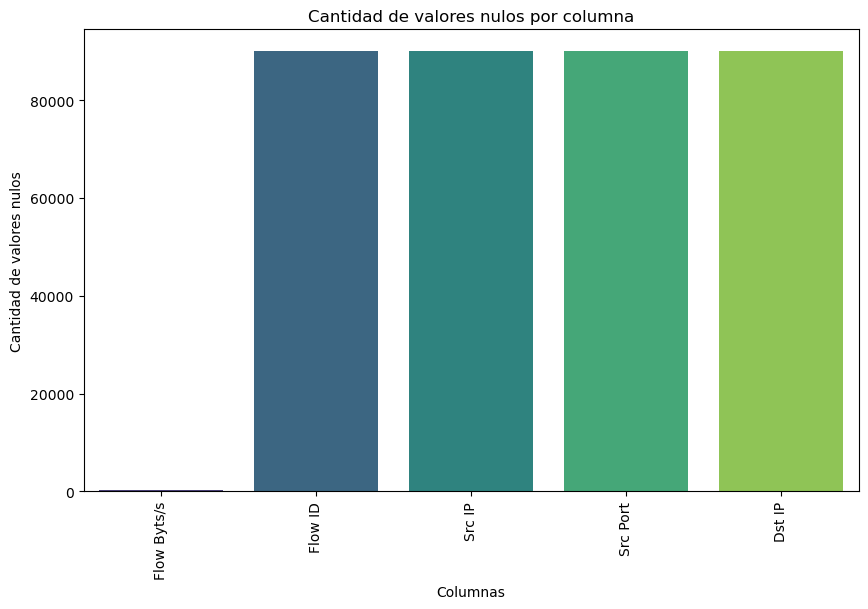

In [9]:
valores_nulos = muestra_combinada.isnull().sum()
valores_nulos = valores_nulos[valores_nulos > 0]

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=valores_nulos.index, y=valores_nulos.values, palette="viridis")
plt.xticks(rotation=90)
plt.title('Cantidad de valores nulos por columna')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores nulos')
plt.show()


In [10]:
print(valores_nulos)

Flow Byts/s      352
Flow ID        90000
Src IP         90000
Src Port       90000
Dst IP         90000
dtype: int64


C:\Users\lcgsa\AppData\Local\Temp\ipykernel_16496\1357335487.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tipos_datos.index, y=tipos_datos.values, palette="Set2")


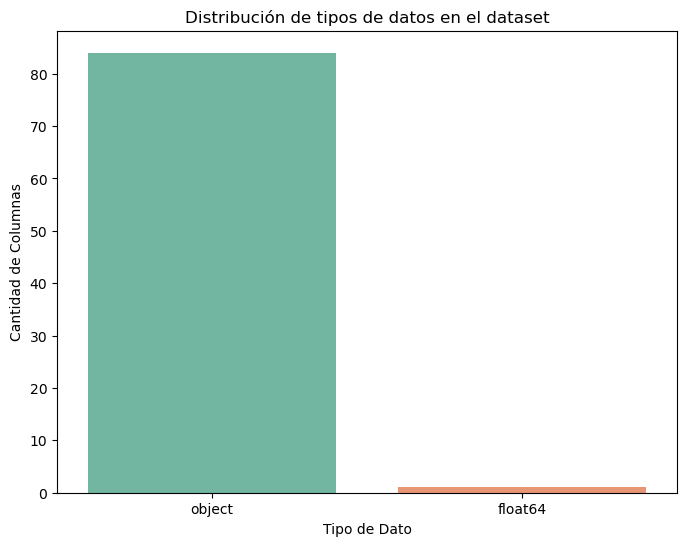

In [11]:
tipos_datos = muestra_combinada.dtypes.value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=tipos_datos.index, y=tipos_datos.values, palette="Set2")
plt.title('Distribución de tipos de datos en el dataset')
plt.xlabel('Tipo de Dato')
plt.ylabel('Cantidad de Columnas')
plt.show()

In [12]:
print(tipos_datos)

object     84
float64     1
Name: count, dtype: int64


In [13]:
columnas_criticas = ['Flow ID', 'Src IP', 'Src Port', 'Dst IP']
muestra_limpia = muestra_combinada.dropna(subset=columnas_criticas).copy()  # para evitar los warnings

# Convertir 'Flow Byts/s' a numérico + imputar valores faltantes con su media
muestra_limpia['Flow Byts/s'] = pd.to_numeric(muestra_limpia['Flow Byts/s'], errors='coerce')
muestra_limpia['Flow Byts/s'] = muestra_limpia['Flow Byts/s'].fillna(muestra_limpia['Flow Byts/s'].mean())

In [14]:
valores_nulos = muestra_limpia.isnull().sum()
valores_nulos = valores_nulos[valores_nulos > 0]

In [15]:
print(muestra_limpia.dtypes.value_counts())

object     83
float64     2
Name: count, dtype: int64


In [16]:
print(muestra_combinada.shape)
print(muestra_limpia.shape)

(100000, 85)
(10000, 85)


In [17]:
print(muestra_limpia['Label'].value_counts())

Label
DDoS attacks-LOIC-HTTP    9934
Benign                      66
Name: count, dtype: int64


Esto quiere decir que he reducido significativamente el número de filas de mi dataset, que es lo que buscamos al eliminar las filas donde alguno de los valores es NA, aunque ha tenido un efecto secundario no muy favorable donde el número de ataques a predecir se ha reducido significativamente. Esto no es lo que buscamos, queremos conservar la variedad (todas las categorías) y no desbalancear el conjunto de datos.

Dejar el dataset con las dimensiones originales no es una opción, tanto por el uso de recursos que necesita como por problemas posteriores relacionado con los modelos de Machine Learning, ya que crear una red neuronal con esta cantidad de datos no es viable en mi caso.

Primero de todo, tras haber realizado un análisis rápido, vamos a eliminar esta fila potencialmente errónea que vemos cuando listamos la cantidad de filas que corresponde a cada categoría. Concretamente hablamos de la fila donde Label tiene como valor label, que no corresponde a un ataque real. Si observamos su contenido veremos que sirve para dar nombre a las filas del dataset, pero no es necesaria.

In [19]:
muestra_combinada[muestra_combinada['Label'] == 'Label']

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Idle Mean,Idle Std,Idle Max,Idle Min,Label,source_file,Flow ID,Src IP,Src Port,Dst IP
80413,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Idle Mean,Idle Std,Idle Max,Idle Min,Label,03-01-2018.csv,NaN,NaN,NaN,NaN


In [20]:
muestra_combinada = muestra_combinada[muestra_combinada['Label'] != 'Label']

# Muestreo

Para hacer el muestreo de datos, la opción más estratégica será conservar las clases minoritarias para mantener la variabilidad y eliminar de las clases mayoritarias algunos registros, concretamente de los datos que contengan datos faltantes para asegurarnos que mantenemos la mayor cantidad de información posible.

In [22]:
df = muestra_combinada.copy()

print("Distribución de clases original:")
print(df['Label'].value_counts())

# Se define el umbral para separar las clases minoritarias
umbral_minoria = 2000  # Pendiente de decidir el valor ajustado
conteo_clases = df['Label'].value_counts()

clases_minoritaria = conteo_clases[conteo_clases < umbral_minoria].index.tolist()
clases_mayoritaria = conteo_clases[conteo_clases >= umbral_minoria].index.tolist()

# Conservar todas las clases minoritarias
df_minoritaria = df[df['Label'].isin(clases_minoritaria)]

# Reducir clases mayoritarias conservando calidad (excepto nulos)
muestras_filtradas = []

n_muestra = 3000 # Cantidad de registros por clase mayoritaria; pendiente cambiar este valor

for clase in clases_mayoritaria:
    subset = df[df['Label'] == clase]
    subset = subset.copy() # para evitar los warnings
    subset['null_count'] = subset.isnull().sum(axis=1)
    subset = subset.sort_values('null_count').drop(columns='null_count').head(n_muestra)
    muestras_filtradas.append(subset)

df_muestreado = pd.concat([df_minoritaria] + muestras_filtradas, ignore_index=True)

print("\nDistribución de clases tras el muestreo:")
print(df_muestreado['Label'].value_counts())
print(f"\nDimensiones finales del dataset: {df_muestreado.shape}")

Distribución de clases original:
Label
Benign                      43083
DDoS attacks-LOIC-HTTP       9934
DoS attacks-GoldenEye        9931
FTP-BruteForce               9904
DoS attacks-SlowHTTPTest     9899
Bot                          8520
DDOS attack-HOIC             6070
DDOS attack-LOIC-UDP         1730
Brute Force -Web              611
Brute Force -XSS              230
SQL Injection                  87
Name: count, dtype: int64

Distribución de clases tras el muestreo:
Label
Benign                      3000
DDoS attacks-LOIC-HTTP      3000
DoS attacks-GoldenEye       3000
FTP-BruteForce              3000
DoS attacks-SlowHTTPTest    3000
Bot                         3000
DDOS attack-HOIC            3000
DDOS attack-LOIC-UDP        1730
Brute Force -Web             611
Brute Force -XSS             230
SQL Injection                 87
Name: count, dtype: int64

Dimensiones finales del dataset: (23658, 85)


# Selección de variables: XXXXXX

Estado actual:
- Actualmente tenemos muchas variables (85), la mayoría numéricas y algunas categóricas.
- Hay un alto porcentaje de valores nulos en bastantes variables.
- El siguiente paso es hacer un modelo de Machine Learning.
- Quiero identificar variables relevantes, no transformar datos.

Finalmente se ha decidido no aplicar PCA por varios motivos: se pierde interpretabilidad de las variables debido a que se realizan combinaciones lineales, no tolera valores nulos y solo se aceptan variables numéricas (aunque podamos utilizar ténicas de binarización de las variables categóricas, no es lo que estamos buscando).

En este caso, debemos tener un criterio antes de eliminar cualquier columna, ya que esto puede afectar significativamente al futuro modelo de machine learning. Tras haber evaluado múltiples opciones disponibles, finalmente el criterio humano debe ser un primer filtro para realizar la eliminación con cautela. Mirando a futuro, estas son las variables categóricas que NO se eliminarán ya que se considera que de por sí contienen información muy valiosa:

- Protocol (ej. TCP, UDP) y Flow Duration pueden ser importantes para distinguir entre tráfico normal y malicioso.
- Destination Port puede ayudar a identificar patrones de ataque en ciertos servicios expuestos.
- Label es clave y nunca debe eliminarse.

Tenemos variables de tipo Object a excepción de una, por lo que antes de hacer nada más daremos el tipo a cada variable.

In [25]:
df_muestreado.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Idle Mean,Idle Std,Idle Max,Idle Min,Label,source_file,Flow ID,Src IP,Src Port,Dst IP
0,80,17,21/02/2018 10:08:51,119893441,309629,0,9908128,0,32,32,...,0.0,0.0,0.0,0.0,DDOS attack-LOIC-UDP,02-21-2018.csv,NaN,NaN,NaN,NaN
1,80,17,21/02/2018 10:08:52,119745803,259444,0,8302208,0,32,32,...,0.0,0.0,0.0,0.0,DDOS attack-LOIC-UDP,02-21-2018.csv,NaN,NaN,NaN,NaN
2,80,17,21/02/2018 10:08:53,119965025,248800,0,7961600,0,32,32,...,0.0,0.0,0.0,0.0,DDOS attack-LOIC-UDP,02-21-2018.csv,NaN,NaN,NaN,NaN
3,80,17,21/02/2018 10:08:54,119999991,272337,0,8714784,0,32,32,...,0.0,0.0,0.0,0.0,DDOS attack-LOIC-UDP,02-21-2018.csv,NaN,NaN,NaN,NaN
4,80,17,21/02/2018 10:08:54,119820553,219539,0,7025248,0,32,32,...,0.0,0.0,0.0,0.0,DDOS attack-LOIC-UDP,02-21-2018.csv,NaN,NaN,NaN,NaN


In [109]:
df_muestreado['Dst Port'] = pd.to_numeric(df_muestreado['Dst Port'], errors='coerce').astype('Int64')
df_muestreado['Protocol'] = pd.to_numeric(df_muestreado['Protocol'], errors='coerce').astype('Int64')
df_muestreado['Timestamp'] = pd.to_datetime(df_muestreado['Timestamp'], format='%d/%m/%Y %H:%M:%S')
df_muestreado['Flow Duration'] = pd.to_numeric(df_muestreado['Flow Duration'], errors='coerce').astype('Int64')
df_muestreado['Tot Fwd Pkts'] = pd.to_numeric(df_muestreado['Tot Fwd Pkts'], errors='coerce').astype('Int64')
df_muestreado['Tot Bwd Pkts'] = pd.to_numeric(df_muestreado['Tot Bwd Pkts'], errors='coerce').astype('Int64')
df_muestreado['TotLen Fwd Pkts'] = pd.to_numeric(df_muestreado['TotLen Fwd Pkts'], errors='coerce').astype('Int64')
df_muestreado['TotLen Bwd Pkts'] = pd.to_numeric(df_muestreado['TotLen Bwd Pkts'], errors='coerce').astype('Int64')
df_muestreado['Fwd Pkt Len Max'] = pd.to_numeric(df_muestreado['Fwd Pkt Len Max'], errors='coerce').astype('Int64')
df_muestreado['Fwd Pkt Len Min'] = pd.to_numeric(df_muestreado['Fwd Pkt Len Min'], errors='coerce').astype('Int64')
df_muestreado['Fwd Pkt Len Mean'] = df_muestreado['Fwd Pkt Len Mean'].astype(float)
df_muestreado['Fwd Pkt Len Std'] = df_muestreado['Fwd Pkt Len Std'].astype(float)
df_muestreado['Bwd Pkt Len Max'] = pd.to_numeric(df_muestreado['Bwd Pkt Len Max'], errors='coerce').astype('Int64')
df_muestreado['Bwd Pkt Len Min'] = pd.to_numeric(df_muestreado['Bwd Pkt Len Min'], errors='coerce').astype('Int64')
df_muestreado['Bwd Pkt Len Mean'] = df_muestreado['Bwd Pkt Len Mean'].astype(float)
df_muestreado['Bwd Pkt Len Std'] = df_muestreado['Bwd Pkt Len Std'].astype(float)
df_muestreado['Flow Byts/s'] = df_muestreado['Flow Byts/s'].astype(float)
df_muestreado['Flow Pkts/s'] = df_muestreado['Flow Pkts/s'].astype(float)
df_muestreado['Flow IAT Mean'] = df_muestreado['Flow IAT Mean'].astype(float)
df_muestreado['Flow IAT Std'] = df_muestreado['Flow IAT Std'].astype(float)
df_muestreado['Flow IAT Max'] = df_muestreado['Flow IAT Max'].astype(float)
df_muestreado['Flow IAT Min'] = df_muestreado['Flow IAT Min'].astype(float)
df_muestreado['Fwd IAT Tot'] = df_muestreado['Fwd IAT Tot'].astype(float)
df_muestreado['Fwd IAT Mean'] = df_muestreado['Fwd IAT Mean'].astype(float)
df_muestreado['Fwd IAT Std'] = df_muestreado['Fwd IAT Std'].astype(float)
df_muestreado['Fwd IAT Max'] = df_muestreado['Fwd IAT Max'].astype(float)
df_muestreado['Fwd IAT Min'] = df_muestreado['Fwd IAT Min'].astype(float)
df_muestreado['Bwd IAT Tot'] = df_muestreado['Bwd IAT Tot'].astype(float)
df_muestreado['Bwd IAT Mean'] = df_muestreado['Bwd IAT Mean'].astype(float)
df_muestreado['Bwd IAT Std'] = df_muestreado['Bwd IAT Std'].astype(float)
df_muestreado['Bwd IAT Max'] = pd.to_numeric(df_muestreado['Bwd IAT Max'], errors='coerce').astype('Int64')
df_muestreado['Bwd IAT Min'] = pd.to_numeric(df_muestreado['Bwd IAT Min'], errors='coerce').astype('Int64')
df_muestreado['Fwd PSH Flags'] = pd.to_numeric(df_muestreado['Fwd PSH Flags'], errors='coerce').astype('Int64')
df_muestreado['Bwd PSH Flags'] = pd.to_numeric(df_muestreado['Bwd PSH Flags'], errors='coerce').astype('Int64')
df_muestreado['Fwd URG Flags'] = pd.to_numeric(df_muestreado['Fwd URG Flags'], errors='coerce').astype('Int64')
df_muestreado['Bwd URG Flags'] = pd.to_numeric(df_muestreado['Bwd URG Flags'], errors='coerce').astype('Int64')
df_muestreado['Fwd Header Len'] = pd.to_numeric(df_muestreado['Fwd Header Len'], errors='coerce').astype('Int64')
df_muestreado['Bwd Header Len'] = pd.to_numeric(df_muestreado['Bwd Header Len'], errors='coerce').astype('Int64')
df_muestreado['Fwd Pkts/s'] = df_muestreado['Fwd Pkts/s'].astype(float)
df_muestreado['Bwd Pkts/s'] = df_muestreado['Bwd Pkts/s'].astype(float)
df_muestreado['Pkt Len Min'] = pd.to_numeric(df_muestreado['Pkt Len Min'], errors='coerce').astype('Int64')
df_muestreado['Bwd IAT Max'] = pd.to_numeric(df_muestreado['Bwd IAT Max'], errors='coerce').astype('Int64')
df_muestreado['Pkt Len Max'] = pd.to_numeric(df_muestreado['Pkt Len Max'], errors='coerce').astype('Int64')
df_muestreado['Pkt Len Mean'] = df_muestreado['Pkt Len Mean'].astype(float)
df_muestreado['Pkt Len Std'] = df_muestreado['Pkt Len Std'].astype(float)
df_muestreado['Pkt Len Var'] = df_muestreado['Pkt Len Var'].astype(float)
df_muestreado['FIN Flag Cnt'] = pd.to_numeric(df_muestreado['FIN Flag Cnt'], errors='coerce').astype('Int64')
df_muestreado['SYN Flag Cnt'] = pd.to_numeric(df_muestreado['SYN Flag Cnt'], errors='coerce').astype('Int64')
df_muestreado['RST Flag Cnt'] = pd.to_numeric(df_muestreado['RST Flag Cnt'], errors='coerce').astype('Int64')
df_muestreado['PSH Flag Cnt'] = pd.to_numeric(df_muestreado['PSH Flag Cnt'], errors='coerce').astype('Int64')
df_muestreado['ACK Flag Cnt'] = pd.to_numeric(df_muestreado['ACK Flag Cnt'], errors='coerce').astype('Int64')
df_muestreado['URG Flag Cnt'] = pd.to_numeric(df_muestreado['URG Flag Cnt'], errors='coerce').astype('Int64')
df_muestreado['CWE Flag Count'] = pd.to_numeric(df_muestreado['CWE Flag Count'], errors='coerce').astype('Int64')
df_muestreado['ECE Flag Cnt'] = pd.to_numeric(df_muestreado['ECE Flag Cnt'], errors='coerce').astype('Int64')
df_muestreado['Down/Up Ratio'] = pd.to_numeric(df_muestreado['Down/Up Ratio'], errors='coerce').astype('Int64')
df_muestreado['Pkt Size Avg'] = df_muestreado['Pkt Size Avg'].astype(float)
df_muestreado['Fwd Seg Size Avg'] = df_muestreado['Fwd Seg Size Avg'].astype(float)
df_muestreado['Bwd Seg Size Avg'] = df_muestreado['Bwd Seg Size Avg'].astype(float)
df_muestreado['Fwd Byts/b Avg'] = pd.to_numeric(df_muestreado['Fwd Byts/b Avg'], errors='coerce').astype('Int64')
df_muestreado['Fwd Pkts/b Avg'] = pd.to_numeric(df_muestreado['Fwd Pkts/b Avg'], errors='coerce').astype('Int64')
df_muestreado['Fwd Blk Rate Avg'] = pd.to_numeric(df_muestreado['Fwd Blk Rate Avg'], errors='coerce').astype('Int64')
df_muestreado['Bwd Byts/b Avg'] = pd.to_numeric(df_muestreado['Bwd Byts/b Avg'], errors='coerce').astype('Int64')
df_muestreado['Bwd Pkts/b Avg'] = pd.to_numeric(df_muestreado['Bwd Pkts/b Avg'], errors='coerce').astype('Int64')
df_muestreado['Bwd Blk Rate Avg'] = pd.to_numeric(df_muestreado['Bwd Blk Rate Avg'], errors='coerce').astype('Int64')
df_muestreado['Subflow Fwd Pkts'] = pd.to_numeric(df_muestreado['Subflow Fwd Pkts'], errors='coerce').astype('Int64')
df_muestreado['Subflow Fwd Byts'] = pd.to_numeric(df_muestreado['Subflow Fwd Byts'], errors='coerce').astype('Int64')
df_muestreado['Subflow Bwd Pkts'] = pd.to_numeric(df_muestreado['Subflow Bwd Pkts'], errors='coerce').astype('Int64')
df_muestreado['Subflow Bwd Byts'] = pd.to_numeric(df_muestreado['Subflow Bwd Byts'], errors='coerce').astype('Int64')
df_muestreado['Init Fwd Win Byts'] = pd.to_numeric(df_muestreado['Init Fwd Win Byts'], errors='coerce').astype('Int64')
df_muestreado['Init Bwd Win Byts'] = pd.to_numeric(df_muestreado['Init Bwd Win Byts'], errors='coerce').astype('Int64')
df_muestreado['Fwd Act Data Pkts'] = pd.to_numeric(df_muestreado['Fwd Act Data Pkts'], errors='coerce').astype('Int64')
df_muestreado['Fwd Seg Size Min'] = pd.to_numeric(df_muestreado['Fwd Seg Size Min'], errors='coerce').astype('Int64')
df_muestreado['Active Mean'] = df_muestreado['Active Mean'].astype(float)
df_muestreado['Active Std'] = df_muestreado['Active Std'].astype(float)
df_muestreado['Active Max'] = pd.to_numeric(df_muestreado['Active Max'], errors='coerce').astype('Int64')
df_muestreado['Active Min'] = pd.to_numeric(df_muestreado['Active Min'], errors='coerce').astype('Int64')
df_muestreado['Idle Mean'] = df_muestreado['Idle Mean'].astype(float)
df_muestreado['Idle Std'] = df_muestreado['Idle Std'].astype(float)
df_muestreado['Idle Max'] = df_muestreado['Idle Max'].astype(float)
df_muestreado['Idle Min'] = df_muestreado['Idle Min'].astype(float)
df_muestreado['Label'] = df_muestreado['Label'].astype('category')
df_muestreado['source_file'] = df_muestreado['source_file'].astype('category')
df_muestreado['Flow ID'] = df_muestreado['Flow ID'].astype(str)
df_muestreado['Src Port'] = df_muestreado['Src Port'].astype(float)
df_muestreado['Dst IP'] = df_muestreado['Dst IP'].astype(str)

In [111]:
df_muestreado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23658 entries, 0 to 23657
Data columns (total 85 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Dst Port           23658 non-null  Int64         
 1   Protocol           23658 non-null  Int64         
 2   Timestamp          23658 non-null  datetime64[ns]
 3   Flow Duration      23658 non-null  Int64         
 4   Tot Fwd Pkts       23658 non-null  Int64         
 5   Tot Bwd Pkts       23658 non-null  Int64         
 6   TotLen Fwd Pkts    23658 non-null  Int64         
 7   TotLen Bwd Pkts    23658 non-null  Int64         
 8   Fwd Pkt Len Max    23658 non-null  Int64         
 9   Fwd Pkt Len Min    23658 non-null  Int64         
 10  Fwd Pkt Len Mean   23658 non-null  float64       
 11  Fwd Pkt Len Std    23658 non-null  float64       
 12  Bwd Pkt Len Max    23658 non-null  Int64         
 13  Bwd Pkt Len Min    23658 non-null  Int64         
 14  Bwd Pk

In [113]:
df_muestreado.head()

,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Idle Mean,Idle Std,Idle Max,Idle Min,Label,source_file,Flow ID,Src IP,Src Port,Dst IP
0,80,17,2018-02-21 10:08:51,119893441,309629,0,9908128,0,32,32,...,0.0,0.0,0.0,0.0,DDOS attack-LOIC-UDP,02-21-2018.csv,nan,NaN,NaN,nan
1,80,17,2018-02-21 10:08:52,119745803,259444,0,8302208,0,32,32,...,0.0,0.0,0.0,0.0,DDOS attack-LOIC-UDP,02-21-2018.csv,nan,NaN,NaN,nan
2,80,17,2018-02-21 10:08:53,119965025,248800,0,7961600,0,32,32,...,0.0,0.0,0.0,0.0,DDOS attack-LOIC-UDP,02-21-2018.csv,nan,NaN,NaN,nan
3,80,17,2018-02-21 10:08:54,119999991,272337,0,8714784,0,32,32,...,0.0,0.0,0.0,0.0,DDOS attack-LOIC-UDP,02-21-2018.csv,nan,NaN,NaN,nan
4,80,17,2018-02-21 10:08:54,119820553,219539,0,7025248,0,32,32,...,0.0,0.0,0.0,0.0,DDOS attack-LOIC-UDP,02-21-2018.csv,nan,NaN,NaN,nan


In [115]:
X = df_muestreado.drop(columns=['Label']) 
y = df_muestreado['Label']

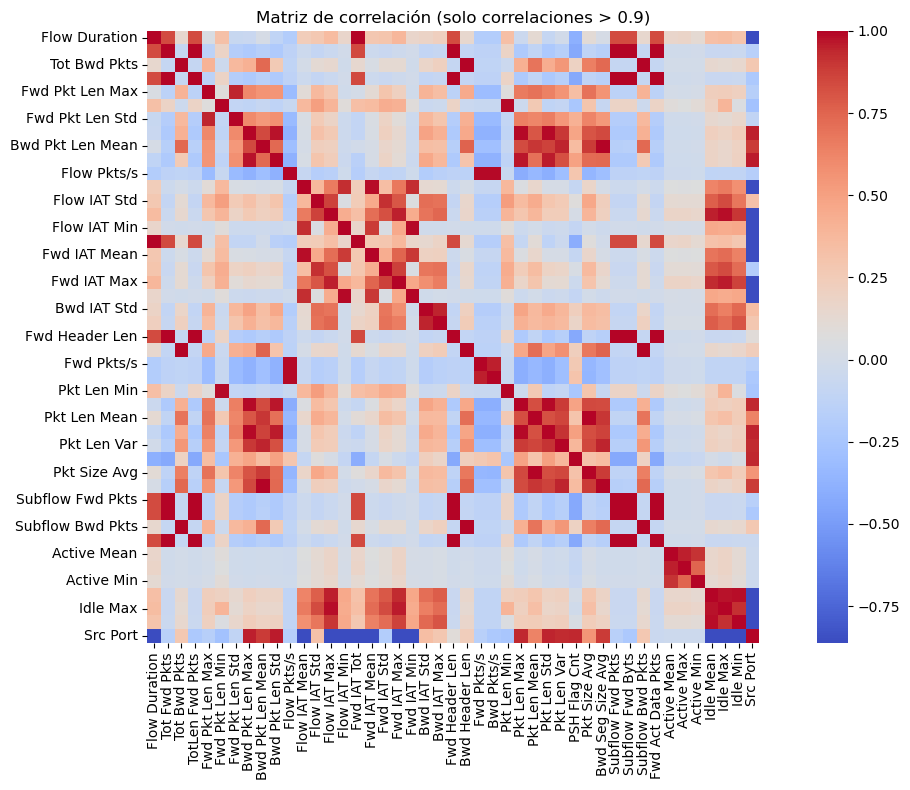

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

X_numeric = X.select_dtypes(include=['int64', 'float64', 'Int64'])
correlation_matrix = X_numeric.corr()

threshold = 0.9
mask = (correlation_matrix.abs() > threshold) & (correlation_matrix.abs() < 1.0)
relevant_columns = mask.any(axis=1)
filtered_corr_matrix = correlation_matrix.loc[relevant_columns, relevant_columns]

plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr_matrix, cmap="coolwarm", square=True)
plt.title('Matriz de correlación (solo correlaciones > 0.9)')
plt.tight_layout()
plt.show()

Este gráfico muestra todas las correlaciones entre variables, pero solo incluye en los ejes aquellas variables que tienen al menos una correlación (en valor absoluto) mayor que 0.9 con alguna otra, para facilitar una visualización más clara.

In [119]:
print(filtered_corr_matrix)

                   Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  TotLen Fwd Pkts  \
Flow Duration           1.000000      0.837879      0.143129         0.838661   
Tot Fwd Pkts            0.837879      1.000000     -0.087722         0.999988   
Tot Bwd Pkts            0.143129     -0.087722      1.000000        -0.083108   
TotLen Fwd Pkts         0.838661      0.999988     -0.083108         1.000000   
Fwd Pkt Len Max         0.033525     -0.137473      0.406955        -0.136035   
Fwd Pkt Len Min         0.330231      0.182000     -0.046505         0.182135   
Fwd Pkt Len Std        -0.072377     -0.184173      0.368492        -0.182879   
Bwd Pkt Len Max        -0.066395     -0.211271      0.414558        -0.210069   
Bwd Pkt Len Mean        0.012073     -0.163592      0.733147        -0.160578   
Bwd Pkt Len Std        -0.113434     -0.213580      0.258784        -0.213132   
Flow Pkts/s            -0.190834     -0.132785     -0.114120        -0.133110   
Flow IAT Mean           0.24

Tras haber obtenido la matriz de correlaciones y su mapa de calor correspondiente, se aplica el criterio de agrupación cuando encontramos variables altamente correlacionadas entre ellas, resultando en lo siguiente:

#### Variables de actividad en la conexión

1. Active Mean, Active Max, Active Min
2. Idle Mean, Idle Max, Idle Min

Active y Idle son medidas temporales de actividad y descanso en la conexión. Se puede conservar una variable representativa de cada grupo para no perder mucha información.

#### Características de longitud de paquetes

3. Pkt Len Mean, Pkt Len Max, Pkt Len Min, Pkt Len Std, Pkt Len Var
4. Bwd Pkt Len Max, Bwd Pkt Len Mean, Bwd Pkt Len Std

La longitud de los paquetes es crucial, pero con mantener solo las métricas más representativas, por ejemplo, Pkt Len Mean y Pkt Len Std, sería suficiente. Así evitamos demasiada redundancia.

#### Medidas de intervalo entre paquetes (IAT)

5. Flow IAT Mean, Flow IAT Max, Flow IAT Min, Flow IAT Std
6. Fwd IAT Mean, Fwd IAT Max, Fwd IAT Min, Fwd IAT Std
7. Bwd IAT Max, Bwd IAT Std

Estas métricas describen los intervalos de tiempo entre paquetes dentro de un flujo. Una opción sería mantener las medidas generales (Flow IAT Mean y Flow IAT Std) en lugar de todas las variantes.

#### Cantidad de paquetes y bytes por flujo

8. Tot Fwd Pkts, Subflow Fwd Pkts
9. Tot Bwd Pkts, Subflow Bwd Pkts
10. TotLen Fwd Pkts, Subflow Fwd Byts
11. TotLen Bwd Pkts, Subflow Bwd Byts

Representan la cantidad y tamaño de paquetes en las direcciones forward y backward. Bajo mi criterio, sería mejor quedarse únicamente con Tot Fwd Pkts y Tot Bwd Pkts, y descartar las versiones de subflujo.

In [129]:
import pandas as pd

variables_a_eliminar = [
    'Active Max', 'Active Min', 'Idle Max', 'Idle Min',
    'Pkt Len Max', 'Pkt Len Min', 'Pkt Len Var',
    'Flow IAT Max', 'Flow IAT Min',
    'Fwd IAT Max', 'Fwd IAT Min', 'Fwd IAT Std',
    'Bwd IAT Max', 'Bwd IAT Std',
    'Subflow Fwd Pkts', 'Subflow Bwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Byts'
]

X_reduced = X.drop(columns=variables_a_eliminar)

print(f"Nuevo número de variables antes de la reducción: {X.shape[1]}")
print(f"Nuevo número de variables después de la reducción: {X_reduced.shape[1]}")


Nuevo número de variables antes de la reducción: 84
Nuevo número de variables después de la reducción: 66


In [131]:
print(X_reduced.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23658 entries, 0 to 23657
Data columns (total 66 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Dst Port           23658 non-null  Int64         
 1   Protocol           23658 non-null  Int64         
 2   Timestamp          23658 non-null  datetime64[ns]
 3   Flow Duration      23658 non-null  Int64         
 4   Tot Fwd Pkts       23658 non-null  Int64         
 5   Tot Bwd Pkts       23658 non-null  Int64         
 6   TotLen Fwd Pkts    23658 non-null  Int64         
 7   TotLen Bwd Pkts    23658 non-null  Int64         
 8   Fwd Pkt Len Max    23658 non-null  Int64         
 9   Fwd Pkt Len Min    23658 non-null  Int64         
 10  Fwd Pkt Len Mean   23658 non-null  float64       
 11  Fwd Pkt Len Std    23658 non-null  float64       
 12  Bwd Pkt Len Max    23658 non-null  Int64         
 13  Bwd Pkt Len Min    23658 non-null  Int64         
 14  Bwd Pk

**PRUEBAS**

In [139]:
print(X_reduced2.describe())  # Verifica los máximos y mínimos por columna

          Dst Port  Protocol    Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
count      23658.0   23658.0          23658.0       23658.0       23658.0   
mean   1571.882154  7.013019  13311522.789712   8585.972821       3.51547   
std    5540.534929  3.280222  34036914.993072  31492.871748     10.854416   
min            0.0       0.0              0.0           1.0           0.0   
25%           21.0       6.0             22.0           1.0           0.0   
50%           80.0       6.0          17237.0           3.0           1.0   
75%           80.0       6.0       5001564.75           4.0           4.0   
max        63856.0      17.0      119999998.0      309629.0         186.0   

       TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
count          23658.0          23658.0          23658.0          23658.0   
mean     275349.344154      1871.205681       141.915166         5.966185   
std     1007623.815108     14187.403698       217.584801         38.97712  

In [146]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Para sustituir valores infinitos o extremos
X_reduced2.replace([np.inf, -np.inf], np.nan, inplace=True)
X_reduced2.fillna(X_reduced2.mean(), inplace=True)  

X_reduced2[['Init Fwd Win Byts', 'Init Bwd Win Byts']] = X_reduced2[['Init Fwd Win Byts', 'Init Bwd Win Byts']].applymap(lambda x: max(x, 0))

cols_to_log = ['Flow Duration', 'Tot Fwd Pkts', 'Active Mean', 'Idle Mean', 'Idle Std']
X_reduced2[cols_to_log] = X_reduced2[cols_to_log].apply(lambda x: np.log1p(x))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_reduced2)

C:\Users\lcgsa\AppData\Local\Temp\ipykernel_16496\3069287028.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_reduced2[['Init Fwd Win Byts', 'Init Bwd Win Byts']] = X_reduced2[['Init Fwd Win Byts', 'Init Bwd Win Byts']].applymap(lambda x: max(x, 0))


In [150]:
print(X_reduced2.describe())

          Dst Port  Protocol  Flow Duration  Tot Fwd Pkts  Tot Bwd Pkts  \
count      23658.0   23658.0        23658.0       23658.0       23658.0   
mean   1571.882154  7.013019       9.612703      2.039099       3.51547   
std    5540.534929  3.280222       6.073082      2.761965     10.854416   
min            0.0       0.0            0.0      0.693147           0.0   
25%           21.0       6.0       3.135494      0.693147           0.0   
50%           80.0       6.0       9.754872      1.386294           1.0   
75%           80.0       6.0      15.425262      1.609438           4.0   
max        63856.0      17.0      18.603002     12.643133         186.0   

       TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  Fwd Pkt Len Min  \
count          23658.0          23658.0          23658.0          23658.0   
mean     275349.344154      1871.205681       141.915166         5.966185   
std     1007623.815108     14187.403698       217.584801         38.97712   
min             

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Dividir datos en entrenamiento y prueba
X_reduced2 = X_reduced.select_dtypes(include=['number'])
X_train, X_test, y_train, y_test = train_test_split(X_reduced2, y, test_size=0.2, random_state=42)

# Entrenar un modelo de prueba
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluación del modelo
print(f"Precisión con variables reducidas: {model.score(X_test, y_test):.4f}")

Precisión con variables reducidas: 0.9243


Esto demuestra que la eliminación de características redundantes y el tratamiento de valores extremos han optimizado el rendimiento del modelo.

In [157]:
pip install shap

   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   ---------------------------------------- 545.2/545.2 kB 9.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_reduced2)

shap.summary_plot(shap_values, X_reduced2)